In [1]:
# this notebook requires nuztf installation
%load_ext autoreload
%autoreload 2

In [1]:
from nuztf.skymap_scanner import SkymapScanner

import pandas as pd
import numpy as np

import os

from tqdm.notebook import tqdm

In [2]:
candidate_filename = "/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-healpix/test2/compareKasliwal_confirmed.ods"
#candidate_filename = "/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-healpix/test2/S190426c_ampel_kasliwal.ods"
#candidate_filename = "/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-healpix/test2/S200115j_rev_0/TransientTable.csv"


O3_candidates = pd.read_excel(candidate_filename)
#data_df = pd.read_csv(candidate_filename, sep=";")

#print(data_df.head())

O3_candidates = O3_candidates.sort_values(by="Kilonovaness", ascending=False)

gw_map = O3_candidates["Healpix map"].unique()
gw_names = [gw[:gw.find(".")] for gw in gw_map]
print(len(O3_candidates))

80


In [3]:
file_dir = "/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-healpix/test2/"

plot_dir = os.path.join(file_dir, "visualisePlots")

try:
    os.makedirs(plot_dir)
except:
    pass

table_name = "TransientTable.csv"
os.listdir(file_dir)

transient_names = []

ampel_candidates = pd.DataFrame()

for transient in os.listdir(file_dir):
    tableFile_dir = os.path.join(file_dir, transient, table_name)
    if os.path.isfile(tableFile_dir):
        table_df = pd.read_csv(tableFile_dir, sep=";")
        transient_names.append(table_df["Healpix map"].iloc[0])

        #pd.read_csv(tableFile_dir, sep=";")

        ampel_candidates = pd.concat([ampel_candidates, table_df])

print(len(ampel_candidates))

try:
    possibleSelectKeys = ampel_candidates.keys()
except:
    print("No transient tables found.")

transient_names.extend(["ALL", "FOLLOWUP"])
print(transient_names)

440
['S190426c.fits.gz,1', 'S190901ap.fits.gz,0', 'S190910d.fits.gz,0', 'S190910h.fits.gz,0', 'S190930t.fits.gz,0', 'S191213g.fits.gz', 'S200115j.fits.gz,0', 'ALL', 'FOLLOWUP']


50

In [4]:
def print_nuztf_summary(gw_name, ztf_ids, data_subset):
    prob_threshold = 0.9
    window = 3

    #ztf_ids = ["ZTF19aatubsj"]

    #print(ztf_ids)

    scanner = SkymapScanner(
        event=gw_name,
        prob_threshold=prob_threshold,
        n_days=window,
    )
    scanner.add_to_cache_by_names(ztf_ids=ztf_ids, with_history=False)

    #print(scanner.cache.keys())

    #alert["kilonova_eval"]["kilonovaness"]

    for ztf_name, cand_dict in scanner.cache.items():
        #print(cand_dict)
        if data_subset.get("Kilonovaness") is not None:
            #print(ztf_name, data_subset[data_subset["ztf_id"] == ztf_name]["Kilonovaness"].values)
            #print(ztf_name, data_subset[data_subset["ztf_id"] == ztf_name]["Kilonovaness"].values[0])
            kilonovaness = data_subset[data_subset["ztf_id"] == ztf_name]["Kilonovaness"].values[0]
        else:
            kilonovaness = None
        #print(ztf_name, data_subset[data_subset["ztf_id"] == ztf_name]["Kilonovaness"].values[0])

        if data_subset.get("Ampel z") is not None:
            z = data_subset[data_subset["ztf_id"] == ztf_name]["Ampel z"].values[0]
        else:
            z = None

        cand_dict.update({"kilonova_eval": {"kilonovaness": kilonovaness, "z": z}})

    #print(scanner.cache.keys())

    scanner.create_candidate_summary()

In [5]:
ampel_and_o3_candidates = ampel_candidates[ampel_candidates["ztf_id"].isin(O3_candidates["ztf_id"])]
gw_map = ampel_and_o3_candidates["Healpix map"].unique()
gw_names = [gw[:gw.find(".")] for gw in gw_map]

print(gw_names)


for i in tqdm(range(0, len(gw_names))):
    gw_name = gw_names[i]
    data_subset = (ampel_and_o3_candidates[ampel_and_o3_candidates["Healpix map"] == gw_map[i]]).sort_values(by="Kilonovaness", ascending=False)

    ztf_ids = np.char.strip(data_subset["ztf_id"].to_numpy(dtype="str"))

    print(gw_name, ztf_ids)
    print_nuztf_summary(gw_name, ztf_ids, data_subset)

['S190426c', 'S190901ap', 'S190910d', 'S190910h', 'S190930t', 'S191213g']


  0%|          | 0/6 [00:00<?, ?it/s]

S190426c ['ZTF19aasknld' 'ZTF19aaslswv' 'ZTF19aaskmit' 'ZTF19aaslfre'
 'ZTF19aatazmc' 'ZTF19aaslzjf' 'ZTF19aaslpds' 'ZTF19aaslozu']


  0%|          | 0/3145728 [00:00<?, ?it/s]

  0%|          | 0/1350 [00:00<?, ?it/s]

dict_keys(['ZTF19aasknld', 'ZTF19aaslswv', 'ZTF19aaskmit', 'ZTF19aaslfre', 'ZTF19aatazmc', 'ZTF19aaslzjf', 'ZTF19aaslpds', 'ZTF19aaslozu'])
{'candid': 1553278213915015026, 'objectId': 'ZTF19aasknld', 'schemavsn': '3.3', 'publisher': 'Ampel', 'candidate': {'jd': 2459307.7782176, 'fid': 1, 'pid': 1553278213915, 'diffmaglim': 20.660327911376953, 'programid': 1, 'candid': 1553278213915015026, 'isdiffpos': 't', 'tblid': 26, 'nid': 1553, 'rcid': 39, 'field': 470, 'xpos': 447.88299560546875, 'ypos': 1724.562255859375, 'ra': 166.5889482, 'dec': 5.0334049, 'magpsf': 20.541717529296875, 'sigmapsf': 0.2058802843093872, 'chipsf': 1.488765001296997, 'magap': 20.604299545288086, 'sigmagap': 0.36559998989105225, 'distnr': 0.35614490509033203, 'magnr': 21.336000442504883, 'sigmagnr': 0.12399999797344208, 'chinr': 0.9459999799728394, 'sharpnr': 0.0020000000949949026, 'sky': 0.43070799112319946, 'magdiff': 0.06258299946784973, 'fwhm': 2.059999942779541, 'classtar': 0.8659999966621399, 'mindtoedge': 447.

  0%|          | 0/8 [00:00<?, ?it/s]

4 BEFORE
4 AFTER
5 BEFORE
3 AFTER
2 BEFORE
2 AFTER
2 BEFORE
2 AFTER
1 BEFORE
1 AFTER
4 BEFORE
4 AFTER
6 BEFORE
5 AFTER
12 BEFORE
11 AFTER
S190901ap ['ZTF19abwvals' 'ZTF19abvionh' 'ZTF19abvixoy' 'ZTF19abviyme'
 'ZTF19abwtibv' 'ZTF19abwsdzf']


  0%|          | 0/196608 [00:00<?, ?it/s]

  0%|          | 0/17576 [00:00<?, ?it/s]

dict_keys(['ZTF19abwvals', 'ZTF19abvionh', 'ZTF19abvixoy', 'ZTF19abviyme', 'ZTF19abwtibv', 'ZTF19abwsdzf'])
{'candid': 976506570515015018, 'objectId': 'ZTF19abwvals', 'schemavsn': '3.3', 'publisher': 'Ampel', 'candidate': {'jd': 2458731.0065741, 'fid': 2, 'pid': 976506570515, 'diffmaglim': 20.275297164916992, 'programid': 2, 'candid': 976506570515015018, 'isdiffpos': 't', 'tblid': 18, 'nid': 976, 'rcid': 5, 'field': 1555, 'xpos': 1606.7965087890625, 'ypos': 2235.80517578125, 'ra': 73.2505545, 'dec': 12.6930304, 'magpsf': 19.829660415649414, 'sigmapsf': 0.19390934705734253, 'chipsf': 1.461130142211914, 'magap': 19.534400939941406, 'sigmagap': 0.19979999959468842, 'distnr': 0.9769606590270996, 'magnr': 19.150999069213867, 'sigmagnr': 0.05999999865889549, 'chinr': 3.36899995803833, 'sharpnr': 0.24400000274181366, 'sky': 0.3196775019168854, 'magdiff': -0.2952609956264496, 'fwhm': 2.359999895095825, 'classtar': 0.9570000171661377, 'mindtoedge': 844.6948852539062, 'magfromlim': 0.74089694023

  0%|          | 0/6 [00:00<?, ?it/s]

1 BEFORE
1 AFTER
1 BEFORE
1 AFTER
25 BEFORE
24 AFTER
4 BEFORE
4 AFTER
1 BEFORE
1 AFTER
8 BEFORE
8 AFTER
S190910d ['ZTF19abyfazm' 'ZTF19abyfhov' 'ZTF19abyfbii' 'ZTF19abyfork'
 'ZTF19abyneqd' 'ZTF19abyiwje' 'ZTF19abykdvd' 'ZTF19abyiwiw'
 'ZTF19abyfhaq' 'ZTF19abyheza' 'ZTF19abyhhml']


  0%|          | 0/786432 [00:00<?, ?it/s]

  0%|          | 0/2957 [00:00<?, ?it/s]

dict_keys(['ZTF19abyfazm', 'ZTF19abyfhov', 'ZTF19abyfbii', 'ZTF19abyfork', 'ZTF19abyneqd', 'ZTF19abyiwje', 'ZTF19abykdvd', 'ZTF19abyiwiw', 'ZTF19abyfhaq', 'ZTF19abyheza', 'ZTF19abyhhml'])
{'candid': 1037137604215015019, 'objectId': 'ZTF19abyfazm', 'schemavsn': '3.3', 'publisher': 'Ampel', 'candidate': {'jd': 2458791.6376042, 'fid': 1, 'pid': 1037137604215, 'diffmaglim': 20.123144149780273, 'programid': 1, 'candid': 1037137604215015019, 'isdiffpos': 't', 'tblid': 19, 'nid': 1037, 'rcid': 42, 'field': 766, 'xpos': 1879.8759765625, 'ypos': 2172.97900390625, 'ra': 290.5359178, 'dec': 48.069228, 'magpsf': 19.996925354003906, 'sigmapsf': 0.21289967000484467, 'chipsf': 1.1416481733322144, 'magap': 19.638399124145508, 'sigmagap': 0.24560000002384186, 'distnr': 6.878276824951172, 'magnr': 17.998001098632812, 'sigmagnr': 0.01600000075995922, 'chinr': 0.8730000257492065, 'sharpnr': -0.014000000432133675, 'sky': -0.3937019109725952, 'magdiff': -0.35852599143981934, 'fwhm': 1.7999999523162842, 'cla

  0%|          | 0/11 [00:00<?, ?it/s]

26 BEFORE
26 AFTER
1 BEFORE
1 AFTER
5 BEFORE
4 AFTER
2 BEFORE
2 AFTER
2 BEFORE
2 AFTER
1 BEFORE
1 AFTER
2 BEFORE
2 AFTER
1 BEFORE
1 AFTER
1 BEFORE
1 AFTER
24 BEFORE
23 AFTER
18 BEFORE
18 AFTER
S190910h ['ZTF19abyirjl' 'ZTF19abyiili' 'ZTF19abyiwje' 'ZTF19abyjcon'
 'ZTF19abyjfiw' 'ZTF19abyjcoo' 'ZTF19abyjcom' 'ZTF19abyimuo'
 'ZTF19abyioqq' 'ZTF19abyhgbn' 'ZTF19abyhgqn' 'ZTF19abygpsw'
 'ZTF19abyiwiw' 'ZTF19abyheza' 'ZTF19abyhhml']


  0%|          | 0/49152 [00:00<?, ?it/s]

  0%|          | 0/28908 [00:00<?, ?it/s]

dict_keys(['ZTF19abyirjl', 'ZTF19abyiili', 'ZTF19abyiwje', 'ZTF19abyjcon', 'ZTF19abyjfiw', 'ZTF19abyjcoo', 'ZTF19abyjcom', 'ZTF19abyimuo', 'ZTF19abyioqq', 'ZTF19abyhgbn', 'ZTF19abyhgqn', 'ZTF19abygpsw', 'ZTF19abyiwiw', 'ZTF19abyheza', 'ZTF19abyhhml'])
{'candid': 2120329294015010010, 'objectId': 'ZTF19abyirjl', 'schemavsn': '3.3', 'publisher': 'Ampel', 'candidate': {'jd': 2459874.829294, 'fid': 2, 'pid': 2120329294015, 'diffmaglim': 20.822404861450195, 'programid': 2, 'candid': 2120329294015010010, 'isdiffpos': 'f', 'tblid': 10, 'nid': 2120, 'rcid': 40, 'field': 1649, 'xpos': 2789.522216796875, 'ypos': 3032.365966796875, 'ra': 30.4710917, 'dec': 30.7335329, 'magpsf': 20.187511444091797, 'sigmapsf': 0.15297135710716248, 'chipsf': 2.527448892593384, 'magap': 20.000200271606445, 'sigmagap': 0.23090000450611115, 'distnr': 2.6856071949005127, 'magnr': 17.84200096130371, 'sigmagnr': 0.08500000089406967, 'chinr': 4.98199987411499, 'sharpnr': 0.6520000100135803, 'sky': -0.03346579149365425, 'ma

  0%|          | 0/15 [00:00<?, ?it/s]

23 BEFORE
17 AFTER
2 BEFORE
2 AFTER
1 BEFORE
1 AFTER
1 BEFORE
1 AFTER
6 BEFORE
5 AFTER
1 BEFORE
1 AFTER
1 BEFORE
1 AFTER
2 BEFORE
2 AFTER
2 BEFORE
2 AFTER
2 BEFORE
2 AFTER
2 BEFORE
2 AFTER
2 BEFORE
2 AFTER
1 BEFORE
1 AFTER
24 BEFORE
23 AFTER
18 BEFORE
18 AFTER
S190930t ['ZTF19acbpsuf' 'ZTF19acbvisk' 'ZTF19acccgfn' 'ZTF19acbwaah'
 'ZTF19acbpqlh']


  0%|          | 0/49152 [00:00<?, ?it/s]

  0%|          | 0/28856 [00:00<?, ?it/s]

dict_keys(['ZTF19acbpsuf', 'ZTF19acbvisk', 'ZTF19acccgfn', 'ZTF19acbwaah', 'ZTF19acbpqlh'])
{'candid': 1023328813615015000, 'objectId': 'ZTF19acbpsuf', 'schemavsn': '3.3', 'publisher': 'Ampel', 'candidate': {'jd': 2458777.8288194, 'fid': 2, 'pid': 1023328813615, 'diffmaglim': 19.804670333862305, 'programid': 2, 'candid': 1023328813615015000, 'isdiffpos': 't', 'tblid': 0, 'nid': 1023, 'rcid': 36, 'field': 1689, 'xpos': 169.44769287109375, 'ypos': 158.5467071533203, 'ra': 339.836778, 'dec': 31.4916893, 'magpsf': 19.304410934448242, 'sigmapsf': 0.19951961934566498, 'chipsf': 1.5739102363586426, 'magap': 19.462799072265625, 'sigmagap': 0.21850000321865082, 'distnr': 2.4606568813323975, 'magnr': 21.336999893188477, 'sigmagnr': 0.061000000685453415, 'chinr': 0.6859999895095825, 'sharpnr': 0.09399999678134918, 'sky': -1.1738300323486328, 'magdiff': 0.15839000046253204, 'fwhm': 3.299999952316284, 'classtar': 0.9660000205039978, 'mindtoedge': 158.5467071533203, 'magfromlim': 0.3418695628643036,

  0%|          | 0/5 [00:00<?, ?it/s]

9 BEFORE
8 AFTER
294 BEFORE
291 AFTER
23 BEFORE
23 AFTER
65 BEFORE
63 AFTER
26 BEFORE
25 AFTER
S191213g ['ZTF19acyldun' 'ZTF19acymaru' 'ZTF19acymlhi' 'ZTF19acyfoha'
 'ZTF19acyldum']


  0%|          | 0/3145728 [00:00<?, ?it/s]

  0%|          | 0/5336 [00:00<?, ?it/s]

dict_keys(['ZTF19acyldun', 'ZTF19acymaru', 'ZTF19acymlhi', 'ZTF19acyfoha', 'ZTF19acyldum'])
{'candid': 1121168996215015017, 'objectId': 'ZTF19acyldun', 'schemavsn': '3.3', 'publisher': 'Ampel', 'candidate': {'jd': 2458875.6689931, 'fid': 1, 'pid': 1121168996215, 'diffmaglim': 20.53787612915039, 'programid': 1, 'candid': 1121168996215015017, 'isdiffpos': 't', 'tblid': 17, 'nid': 1121, 'rcid': 62, 'field': 356, 'xpos': 2629.12451171875, 'ypos': 1789.419677734375, 'ra': 79.1999973, 'dec': -7.4786762, 'magpsf': 20.15621566772461, 'sigmapsf': 0.19669672846794128, 'chipsf': 0.8185267448425293, 'magap': 20.041400909423828, 'sigmagap': 0.24770000576972961, 'distnr': 1.1307471990585327, 'magnr': 20.489999771118164, 'sigmagnr': 0.12099999934434891, 'chinr': 2.7090001106262207, 'sharpnr': 0.3529999852180481, 'sky': 0.5650011897087097, 'magdiff': -0.11481600254774094, 'fwhm': 3.3299999237060547, 'classtar': 0.5839999914169312, 'mindtoedge': 443.3753967285156, 'magfromlim': 0.49647659063339233, 'se

  0%|          | 0/5 [00:00<?, ?it/s]

27 BEFORE
24 AFTER
2 BEFORE
2 AFTER
2 BEFORE
2 AFTER
11 BEFORE
11 AFTER
3 BEFORE
2 AFTER


In [6]:
ampel_not_o3_candidates = ampel_candidates[np.logical_not(ampel_candidates["ztf_id"].isin(O3_candidates["ztf_id"]))]
ampel_not_o3_candidates = ampel_not_o3_candidates[ampel_not_o3_candidates["Kilonovaness"] >= -99999]

len(ampel_not_o3_candidates)

390

390
['S190426c', 'S190901ap', 'S190910d', 'S190910h', 'S190930t', 'S191213g', 'S200115j']


  0%|          | 0/7 [00:00<?, ?it/s]

S190426c ['ZTF19aataxum' 'ZTF19aaslpsk' 'ZTF19aaskikg' 'ZTF19aaskktr'
 'ZTF19aaskjsw' 'ZTF19aaslxmg' 'ZTF19aaskjwt' 'ZTF19aaslpqg'
 'ZTF19aaskpbp' 'ZTF19aaskjyj' 'ZTF19aaskyxh' 'ZTF19aasknfi'
 'ZTF19aaslixg' 'ZTF19aaskmpt' 'ZTF19aaskijn' 'ZTF19aasledp'
 'ZTF19aaslrms' 'ZTF19aaslssx' 'ZTF19aaskipx' 'ZTF19aasldad'
 'ZTF19aaskiht' 'ZTF19aaslddj' 'ZTF19aasldsv' 'ZTF19aaskpux'
 'ZTF19aasslob' 'ZTF19aaslfmk' 'ZTF19aaslovx' 'ZTF19aasrgik'
 'ZTF19aasmppj' 'ZTF19aasmqvm' 'ZTF19aaslldo' 'ZTF19aasmdqa'
 'ZTF19aaslell' 'ZTF19aaskihm']


  0%|          | 0/3145728 [00:00<?, ?it/s]

  0%|          | 0/1350 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

S190901ap ['ZTF19abmqasg' 'ZTF19abwsfsl' 'ZTF19abvjovw' 'ZTF19abwrirj'
 'ZTF19abuszom' 'ZTF19abmyalo']


  0%|          | 0/196608 [00:00<?, ?it/s]

  0%|          | 0/17576 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

S190910d ['ZTF19abyivti' 'ZTF19abygrvc' 'ZTF19abynsoz' 'ZTF19abyffnr'
 'ZTF19abykkfr' 'ZTF19abygrxx' 'ZTF19abynhdh' 'ZTF19abykjhn']


  0%|          | 0/786432 [00:00<?, ?it/s]

  0%|          | 0/2957 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

S190910h ['ZTF19abyihlx' 'ZTF19abyjmsy' 'ZTF19abyinyw' 'ZTF19abyhtnt'
 'ZTF19abyhtnr' 'ZTF19abykqfn' 'ZTF19abypmqz' 'ZTF19abymfqp'
 'ZTF19abymfoe' 'ZTF19abykjgf' 'ZTF19abyisvw' 'ZTF19abyimlh'
 'ZTF19abyitkl' 'ZTF19abygwjx' 'ZTF19abyhxnv' 'ZTF19abyimjn'
 'ZTF19abynxkp' 'ZTF19abygvam' 'ZTF19abymgak' 'ZTF19abygvza'
 'ZTF19abynwbf' 'ZTF19abyiptt' 'ZTF19abyidel' 'ZTF19abyigwl'
 'ZTF19abykncf' 'ZTF19abyikum' 'ZTF19abyoirz' 'ZTF19abyrooa'
 'ZTF19abyhczv' 'ZTF19abyhdgr' 'ZTF19abyrmrj' 'ZTF19abyihco'
 'ZTF19abympeo' 'ZTF19abyigfw' 'ZTF19abyijsc' 'ZTF19abyhnbq'
 'ZTF19abyrtpg' 'ZTF19abypphv' 'ZTF19abygurr' 'ZTF19abyitko'
 'ZTF19abyitje' 'ZTF19abyiuhx' 'ZTF19abygpzg' 'ZTF19abygrdx'
 'ZTF19abyhodm' 'ZTF19abyhavv' 'ZTF19abyhnwm' 'ZTF19abygqgo'
 'ZTF19abyikkd' 'ZTF19abyikkf' 'ZTF19abyikkc' 'ZTF19abyiuik'
 'ZTF19abyitww' 'ZTF19abynwyd' 'ZTF19abyitwj' 'ZTF19abynqyc'
 'ZTF19abyobfa' 'ZTF19abyiues' 'ZTF19abyimlz' 'ZTF19abyivti'
 'ZTF19abyitxp' 'ZTF19abylgoz' 'ZTF19abyijrx' 'ZTF19abymxoc'
 'ZTF19abykjhw'

  0%|          | 0/49152 [00:00<?, ?it/s]

  0%|          | 0/28908 [00:00<?, ?it/s]

  0%|          | 0/148 [00:00<?, ?it/s]

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

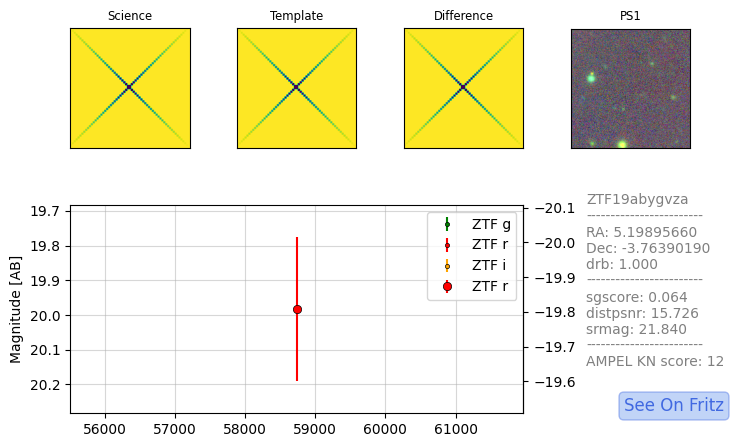

In [5]:
ampel_not_o3_candidates = ampel_candidates[np.logical_not(ampel_candidates["ztf_id"].isin(O3_candidates["ztf_id"]))]
print(len(ampel_not_o3_candidates))
#print(len(ampel_and_o3_candidates))
gw_map = ampel_not_o3_candidates["Healpix map"].unique()
gw_names = [gw[:gw.find(".")] for gw in gw_map]

print(gw_names)


for i in tqdm(range(0, len(gw_names))):
    gw_name = gw_names[i]
    data_subset = (ampel_not_o3_candidates[ampel_not_o3_candidates["Healpix map"] == gw_map[i]]).sort_values(by="Kilonovaness", ascending=False)

    ztf_ids = np.char.strip(data_subset["ztf_id"].to_numpy(dtype="str"))

    print(gw_name, ztf_ids)
    print_nuztf_summary(gw_name, ztf_ids, data_subset)

In [27]:
for i in tqdm(range(0, len(gw_names)- 0)):
    #print(i)
    gw_name = gw_names[i]
    data_subset = (O3_candidates[O3_candidates["Healpix map"] == gw_map[i]]).sort_values(by="Kilonovaness", ascending=False)

    #print(data_subset.head(20))
    
    ztf_ids = np.char.strip(data_subset["ztf_id"].to_numpy(dtype="str"))

    #print(data_subset.head())

    print(gw_name, ztf_ids)
    print_nuztf_summary(gw_name, ztf_ids, data_subset)

    # plan: nimm aus data_df gw_name, 
    # nur für candidates mit dem gw_name, mache pdfs
    # evtl versuche kilonovaness in pdf zu integrieren?

  0%|          | 0/1 [00:00<?, ?it/s]

S190426c ['ZTF19aasknld' 'ZTF19aaslpds' 'ZTF19aaskmit' 'ZTF19aaslfre'
 'ZTF19aaslswv' 'ZTF19aaslzjf' 'ZTF19aatazmc' 'ZTF19aaslolf'
 'ZTF19aaslozu' 'ZTF19aaslphi' 'ZTF19aaslszp' 'ZTF19aaslvwn'
 'ZTF19aaslzfk' 'ZTF19aasmddt' 'ZTF19aasmdir' 'ZTF19aasmekb'
 'ZTF19aasmftm' 'ZTF19aasmzqf' 'ZTF19aassfws' 'ZTF19aasshpf']


  0%|          | 0/3145728 [00:00<?, ?it/s]

  0%|          | 0/1350 [00:00<?, ?it/s]

dict_keys(['ZTF19aasknld', 'ZTF19aaslpds', 'ZTF19aaskmit', 'ZTF19aaslfre', 'ZTF19aaslswv', 'ZTF19aaslzjf', 'ZTF19aatazmc', 'ZTF19aaslolf', 'ZTF19aaslozu', 'ZTF19aaslphi', 'ZTF19aaslszp', 'ZTF19aaslvwn', 'ZTF19aaslzfk', 'ZTF19aasmddt', 'ZTF19aasmdir', 'ZTF19aasmekb', 'ZTF19aasmftm', 'ZTF19aasmzqf', 'ZTF19aassfws', 'ZTF19aasshpf'])
dict_keys(['ZTF19aasknld', 'ZTF19aaslpds', 'ZTF19aaskmit', 'ZTF19aaslfre', 'ZTF19aaslswv', 'ZTF19aaslzjf', 'ZTF19aatazmc', 'ZTF19aaslolf', 'ZTF19aaslozu', 'ZTF19aaslphi', 'ZTF19aaslszp', 'ZTF19aaslvwn', 'ZTF19aaslzfk', 'ZTF19aasmddt', 'ZTF19aasmdir', 'ZTF19aasmekb', 'ZTF19aasmftm', 'ZTF19aasmzqf', 'ZTF19aassfws', 'ZTF19aasshpf'])


  0%|          | 0/20 [00:00<?, ?it/s]

0.129453341
0.106
0.087
0.090271004
0.102
0.0640993333333333
0.07781
None
None
None
None
None
None
None
None
None
None
None
None
None


In [4]:
candidate_filename = "/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-healpix/test2/S191213g/TransientTable.csv"

data = pd.read_csv(candidate_filename, sep=";")
candidates = data.sort_values(by="Kilonovaness", ascending=False)

gw_map = candidates["Healpix map"].unique()
gw_names = [gw[:gw.find(".")] for gw in gw_map]
print(len(candidates))

ztf_ids = np.char.strip(data["ztf_id"].to_numpy(dtype="str"))

print(ztf_ids)

print_nuztf_summary(gw_names[0], ztf_ids, data)

11
['ZTF19acyfoha' 'ZTF19acyldun' 'ZTF19acymems' 'ZTF19acymaru'
 'ZTF19acymlhi' 'ZTF19acyldum' 'ZTF19acynlce' 'ZTF19acyfqbq'
 'ZTF19acylwtd' 'ZTF19acylwtd' 'ZTF19acymdcl']


  0%|          | 0/3145728 [00:00<?, ?it/s]

  0%|          | 0/5336 [00:00<?, ?it/s]

dict_keys(['ZTF19acyfoha', 'ZTF19acyldun', 'ZTF19acymems', 'ZTF19acymaru', 'ZTF19acymlhi', 'ZTF19acyldum', 'ZTF19acynlce', 'ZTF19acyfqbq', 'ZTF19acylwtd', 'ZTF19acymdcl'])
{'candid': 1140210752615015005, 'objectId': 'ZTF19acyfoha', 'schemavsn': '3.3', 'publisher': 'Ampel', 'candidate': {'jd': 2458894.7107523, 'fid': 2, 'pid': 1140210752615, 'diffmaglim': 20.119489669799805, 'programid': 1, 'candid': 1140210752615015005, 'isdiffpos': 't', 'tblid': 5, 'nid': 1140, 'rcid': 26, 'field': 306, 'xpos': 1875.9656982421875, 'ypos': 362.7413024902344, 'ra': 85.1043151, 'dec': -18.0975785, 'magpsf': 19.777664184570312, 'sigmapsf': 0.20811140537261963, 'chipsf': 0.9585481286048889, 'magap': 19.638700485229492, 'sigmagap': 0.30559998750686646, 'distnr': 1.6065020561218262, 'magnr': 17.56599998474121, 'sigmagnr': 0.0989999994635582, 'chinr': 7.431000232696533, 'sharpnr': 0.5540000200271606, 'sky': 0.06311160326004028, 'magdiff': -0.13896499574184418, 'fwhm': 1.2285852432250977, 'classtar': 0.9020000

  0%|          | 0/10 [00:00<?, ?it/s]

11 BEFORE
11 AFTER
27 BEFORE
24 AFTER
2 BEFORE
2 AFTER
2 BEFORE
2 AFTER
2 BEFORE
2 AFTER
3 BEFORE
2 AFTER
2 BEFORE
2 AFTER
1 BEFORE
1 AFTER
35 BEFORE
35 AFTER
2 BEFORE
1 AFTER


In [1]:
import astropy.time as at

In [2]:
utc_time = "2019-12-04 18:00:14 UTC"

gps_time =   	1371866035.82 
at.Time(gps_time, format="gps").jd

2460122.5793381943